# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



## Data Overview

- Observations
- Sanity checks

In [71]:
data = pd.read_csv("/Users/spenc/Programming/DS/Classification and Hyp Test/ExtraaLearn.csv")

In [72]:
copy_data = data.copy()

In [73]:
copy_data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [74]:
copy_data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [75]:
copy_data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [76]:
data.shape

(4612, 15)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [78]:
data["ID"].value_counts()

ID
EXT4612    1
EXT001     1
EXT002     1
EXT003     1
EXT4573    1
          ..
EXT008     1
EXT009     1
EXT010     1
EXT011     1
EXT012     1
Name: count, Length: 4612, dtype: int64

In [79]:
data.duplicated().sum()

np.int64(0)

In [80]:
data = data.drop(columns=["ID"])

In [81]:
data

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [82]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [83]:
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for column in cat_col:
    print(data[column].value_counts(1))
    print('-'*50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

## Observations

- The dataset contains 4612 rows and 15 columns.
- The dataset has a mix of numerical and categorical variables.
- The `ID` column is unique for each row and does not contribute to the analysis so I decided to drop this column.
- There are no missing values in the dataset, as all columns have non-null counts equal to the total number of rows.
- The target variable `status` is binary, indicating whether a lead converted to a paid customer (1) or not (0).
- Numerical columns include `age`, `website_visits`, `time_spent_on_website`, and `page_views_per_visit`.
- Categorical columns include `current_occupation`, `first_interaction`, `profile_completed`, `last_activity`, and others.

## Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins = None):
    figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)

    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = 'pink')

    if bins == None:
        sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist)
    else:
        sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist, bins = bins)

    ax_hist.axvline(data[feature].mean(), color = 'brown', linestyle='--')
    ax_hist.axvline(data[feature].median(), color = 'black', linestyle='-')

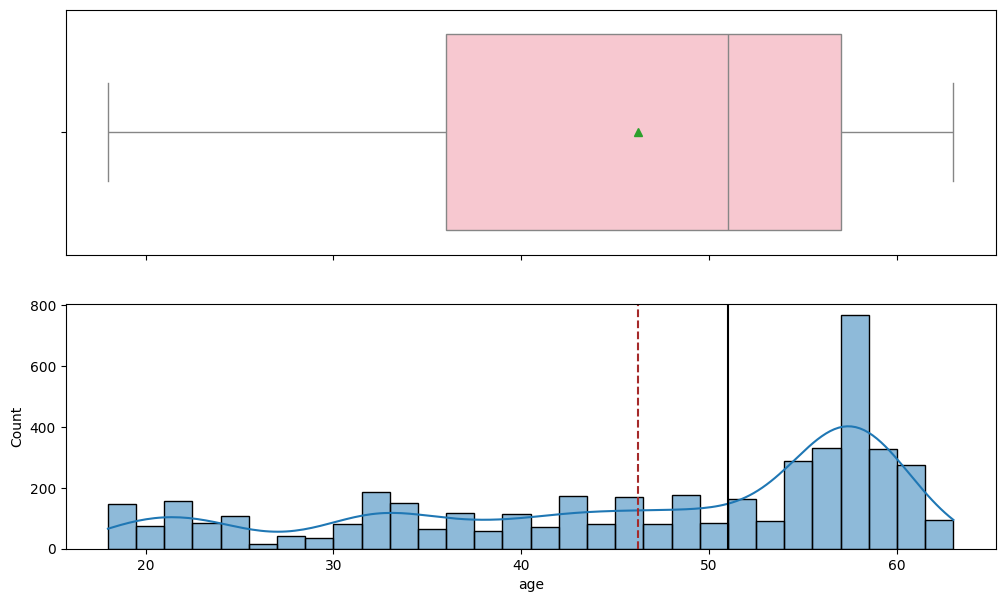

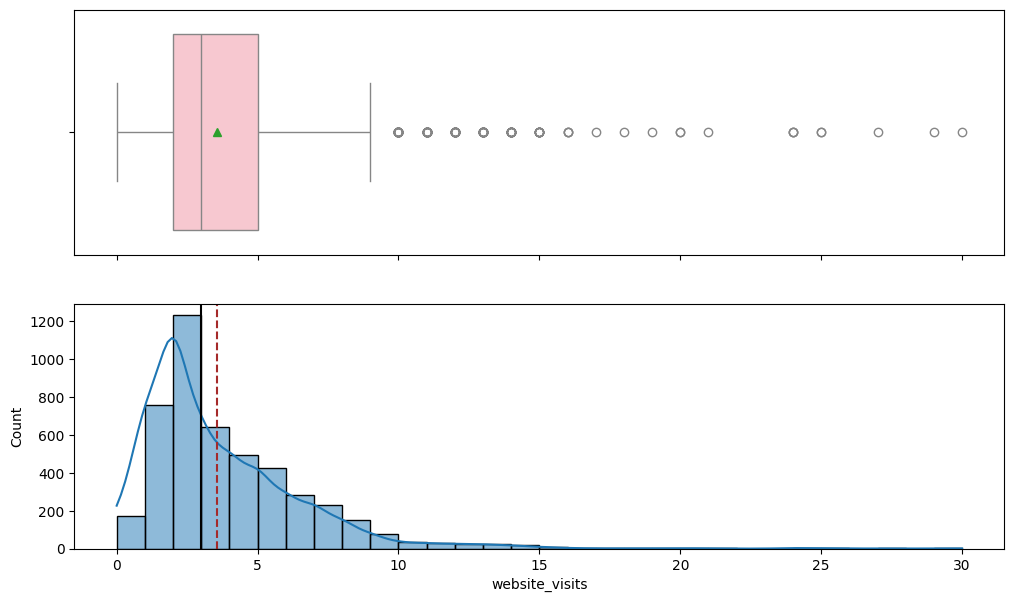

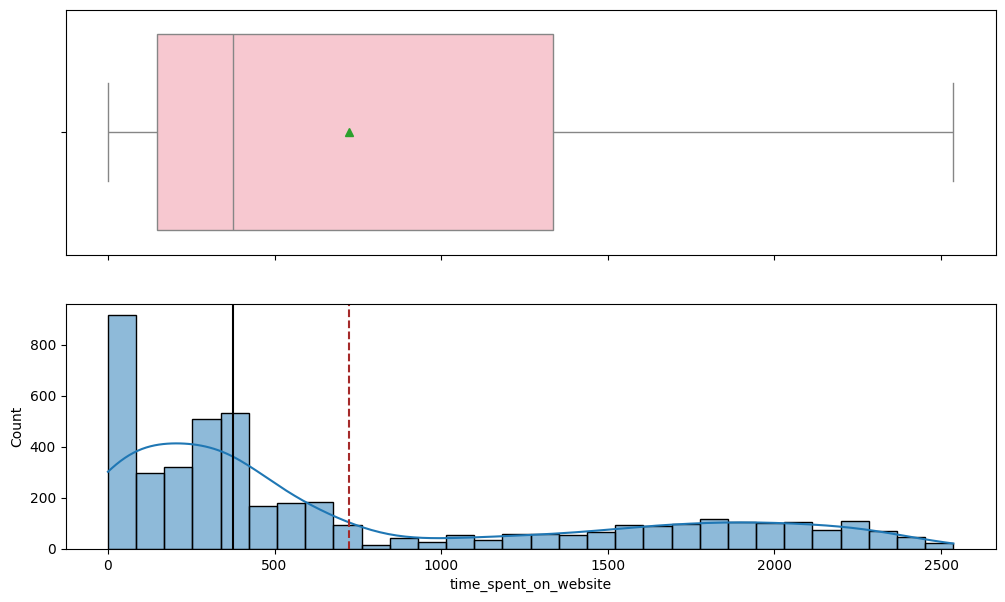

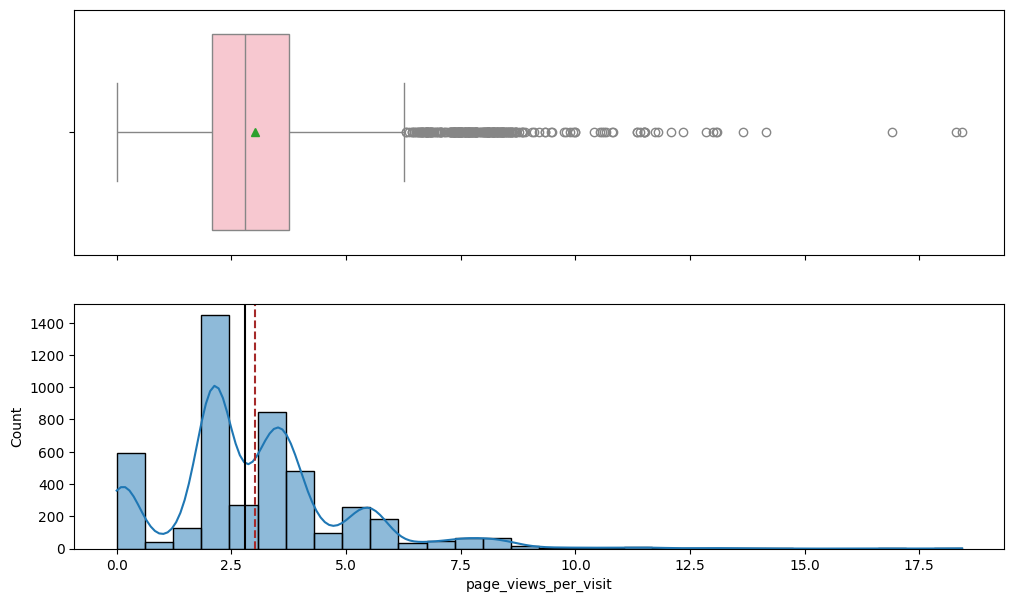

In [ ]:
num_col = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
for columns in num_col:
    histogram_boxplot(data, columns, bins = 30)

## Observations from Univariate Analysis (Numerical Variables)

1. Age
   - Distribution is slightly left‑skewed (younger tail drags the mean below the median).  
   - Main cluster around 55–60 yrs with secondary bumps in the early‑20 s and early‑30 s.  
   - Median ≈ 52 yrs (solid black line); mean ≈ 45 yrs (dashed red line).  
   - Full range ≈ 18–64 yrs; no 1.5 × IQR outliers.

2. Website Visits
   - Heavily right‑skewed count distribution.  
   - Most users make 1–5 visits; median ≈ 3.  
   - Mean ≈ 3–4 visits, lifted by a small group of heavy users.  
   - Statistical outliers start above ~9 visits, maxing out near 30.

3. Time Spent on Website
   - Bimodal: quick sessions (< 500 s) vs. deep sessions (~1 500–2 500 s).  
   - Median ≈ 300 s; mean ≈ 700 s, influenced by longer sessions.  
   - Middle 50 % fall roughly between 200 s and 650 s; no formal outliers beyond whiskers.

4. Page Views per Visit
   - Strong right‑skew with modes at 1 and 2–3 pages (plus a small bump ≈ 5).  
   - Median ≈ 2.5 pages; mean ≈ 3 pages.  
   - Outliers above ~6 pages, stretching to ≈ 18 pages.  
   - Mix of bounce sessions (0–1 page) and a thin tail of heavy browsers.

In [ ]:
data[data["website_visits"] == 0].shape

(174, 14)

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):

    col_length = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+1, 10))
    else: plt.figure(figsize=(n+1,10))

    plt.xticks(rotation=90, fontsize = 10)
    ax = sns.countplot(data = data, x = feature, palette = "Paired", order = data[feature].value_counts().index[:n].sort_values())

    for i in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100*i.get_height()/col_length)
        else:
            label = i.get_height()
        
        x = i.get_x() + i.get_width()/2
        y = i.get_height()

        ax.annotate(label, (x,y), ha='center', va='center', size = 15, xytext=(0,5), textcoords = 'offset points')
    
    plt.show()

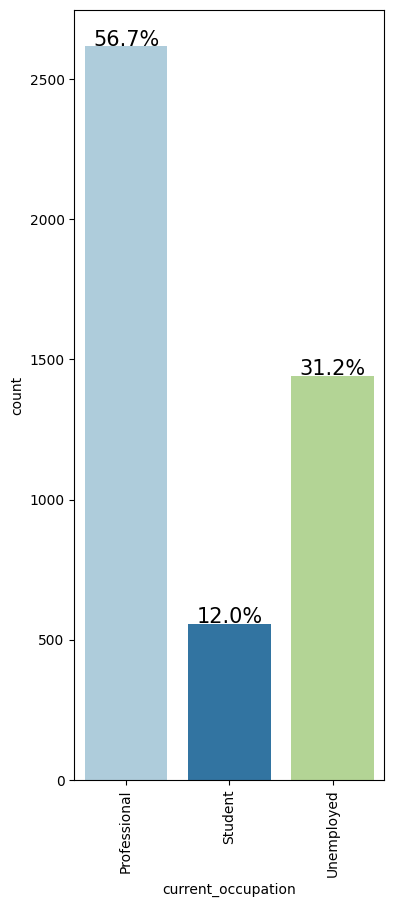

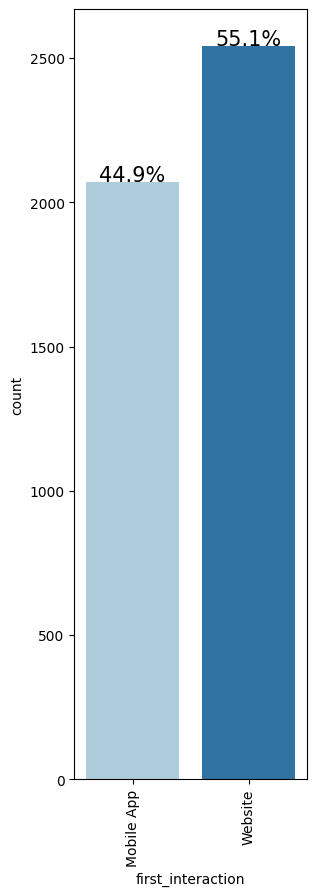

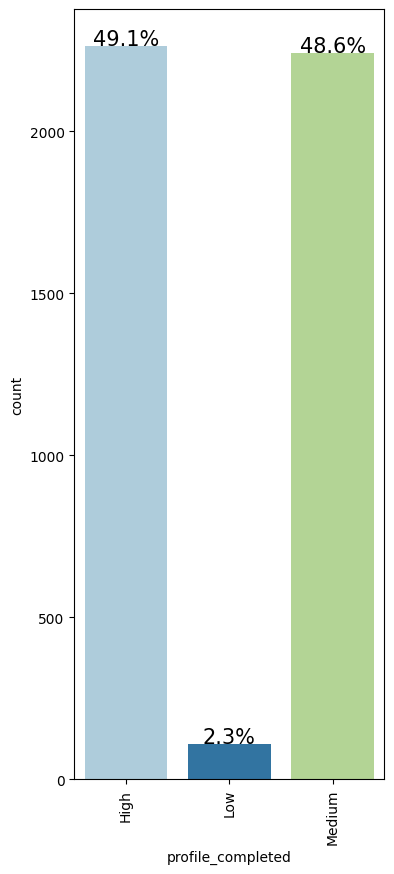

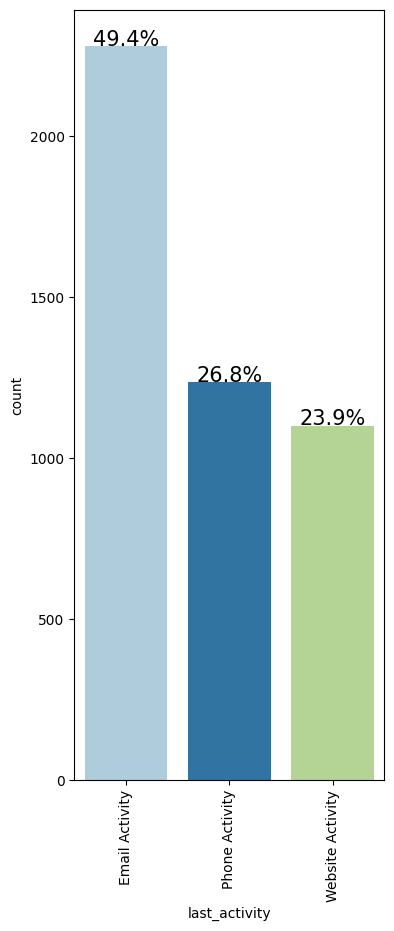

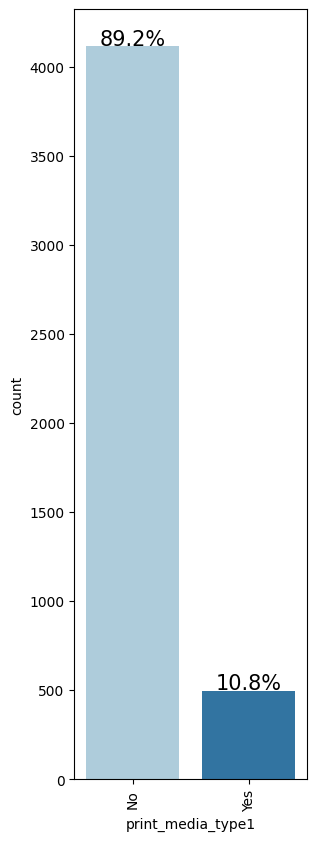

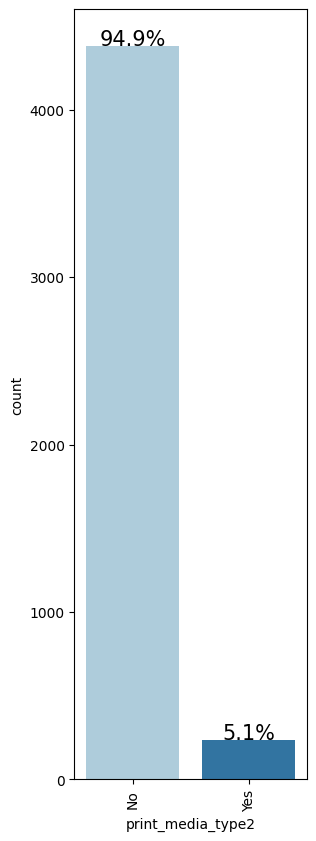

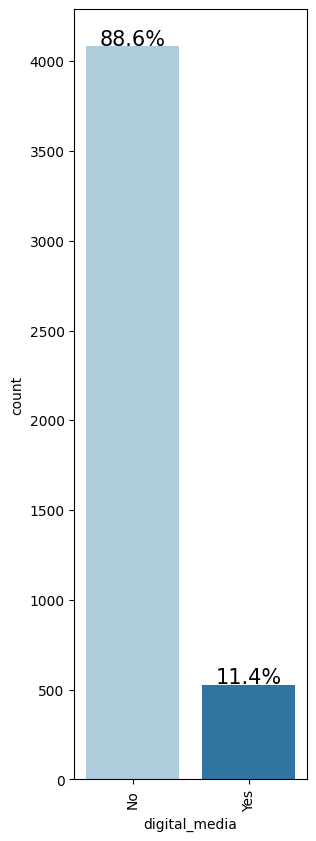

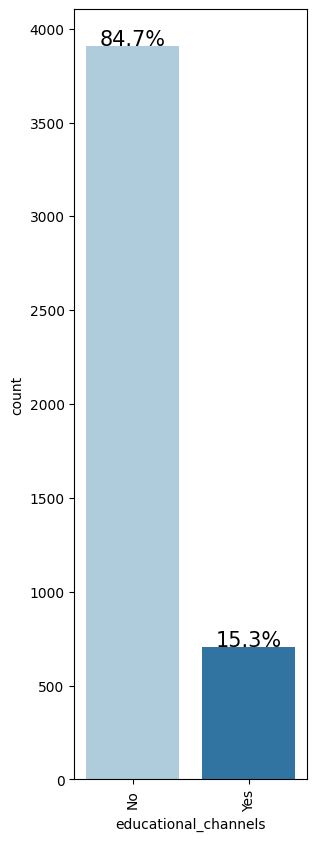

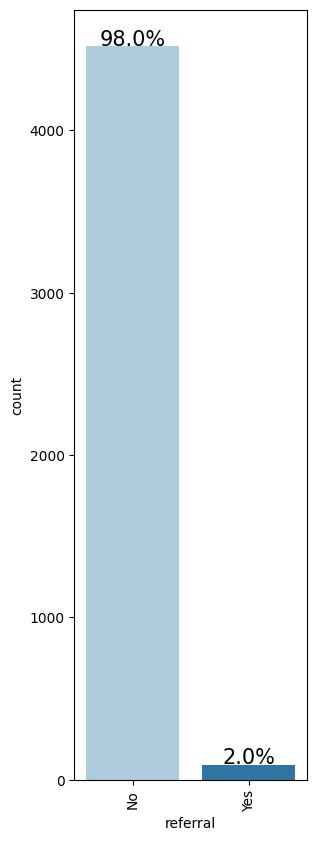

In [ ]:
for col in cat_col:
    labeled_barplot(data, col, perc=True)

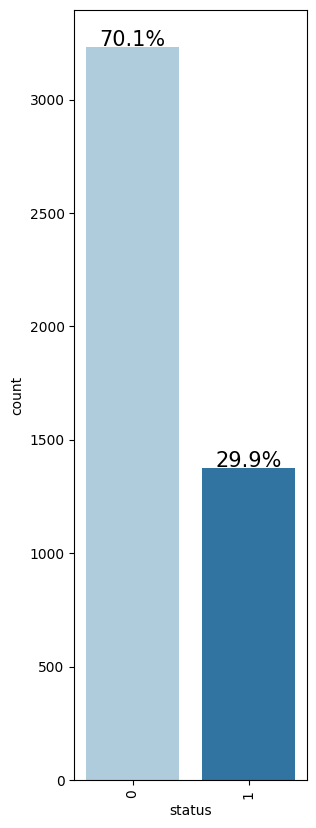

In [ ]:
labeled_barplot(data, "status", perc=True)

## Observations from Univariate Analysis (Categorical Variables)

- Audience make‑up: Mostly professionals (57 %), with a sizable unemployed segment (31 %) and few students.
- First touch: Favored more to the Website (55 %) over Mobile‑App.
- Data quality: Nearly everyone has High/Medium profile completion (98 %).
- Recent engagement: Half of leads’ last action is Email; the rest split between phone and on‑site activity.
- Campaign reach: Print, digital, and educational media each touch ≤ 15 % of leads; referrals are negligible (2 %).
- Funnel status: Roughly 30 % have converted / progressed.

## Bivariate Analysis

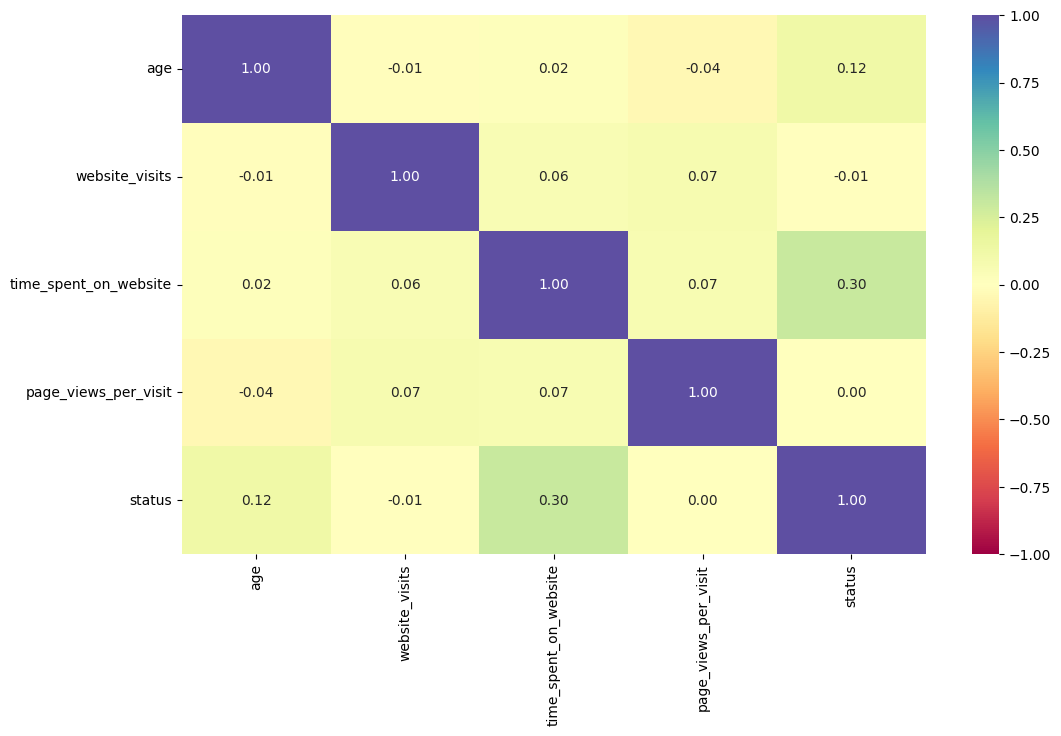

In [ ]:
cols_list = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit", "status"]

# or: cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
def numeric_vs_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    target_unique = data[target].unique()
    
    axs[0, 0].set_title("Distribution of target for target=" + str(target_unique[0]))
    sns.histplot(data=data[data[target] == target_unique[0]], x = predictor, kde = True, ax = axs[0, 0], color = "turquoise", stat="density")

    axs[0, 1].set_title("Distribution of target for target=" + str(target_unique[1]))
    sns.histplot(data=data[data[target] == target_unique[1]], x = predictor, kde = True, ax = axs[0, 1], color = "orange", stat="density")

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data = data, x = target, y = predictor, ax = axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot ,without outliers, w.r.t target")
    sns.boxplot(data = data, x = target, y = predictor, ax = axs[1, 1], showfliers = False, palette = "gist_rainbow")

    plt.tight_layout()
    plt.show()

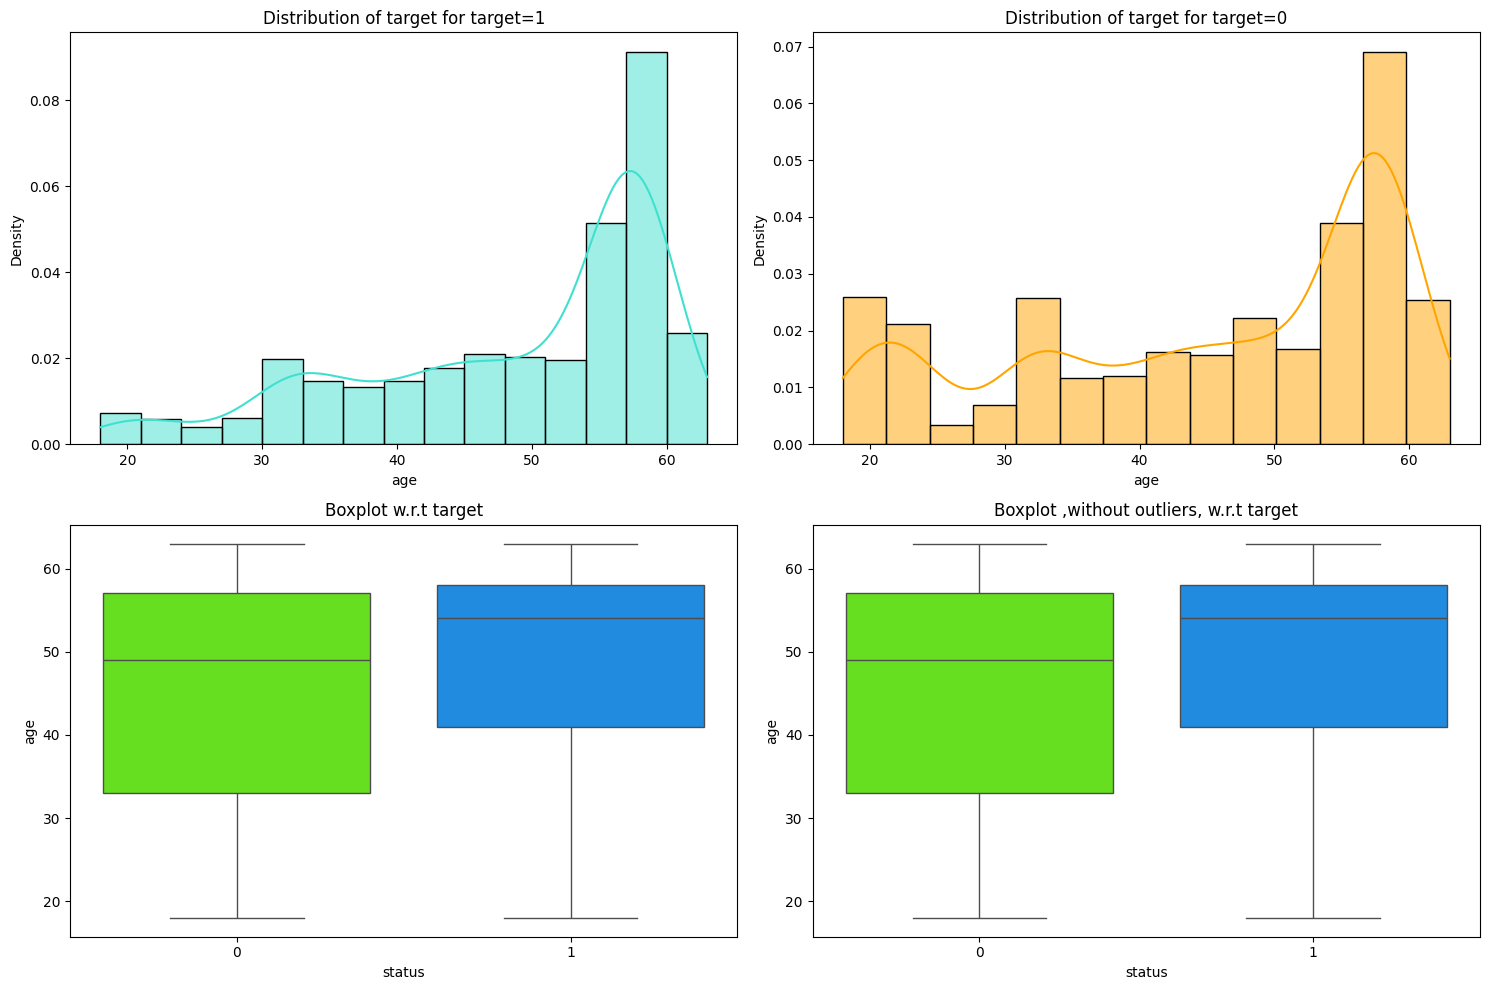

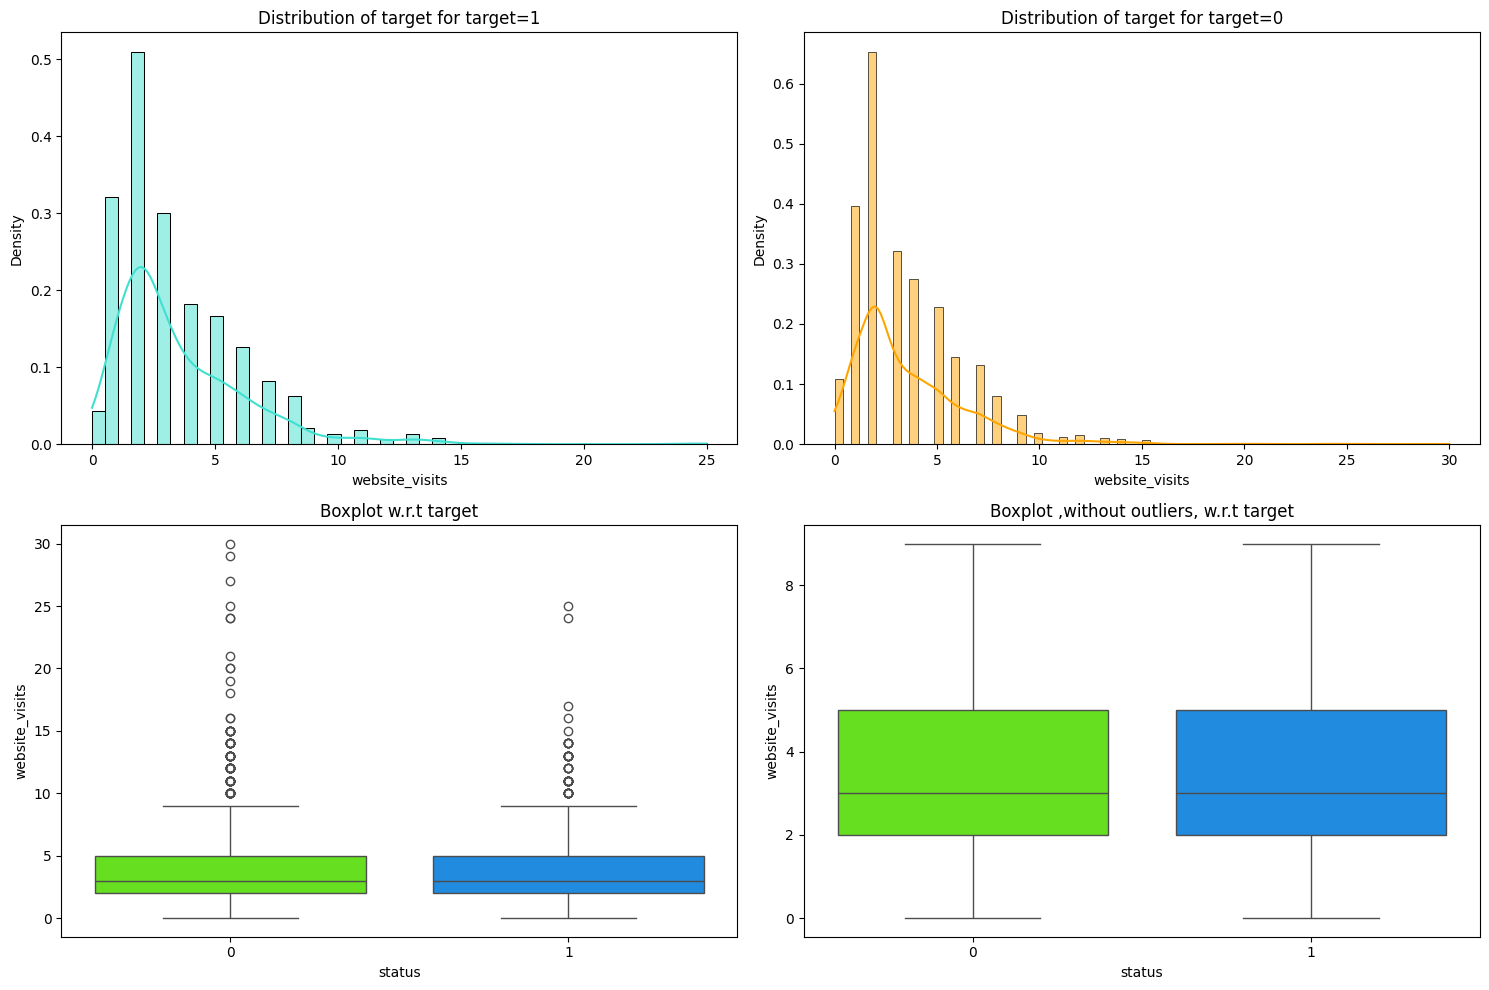

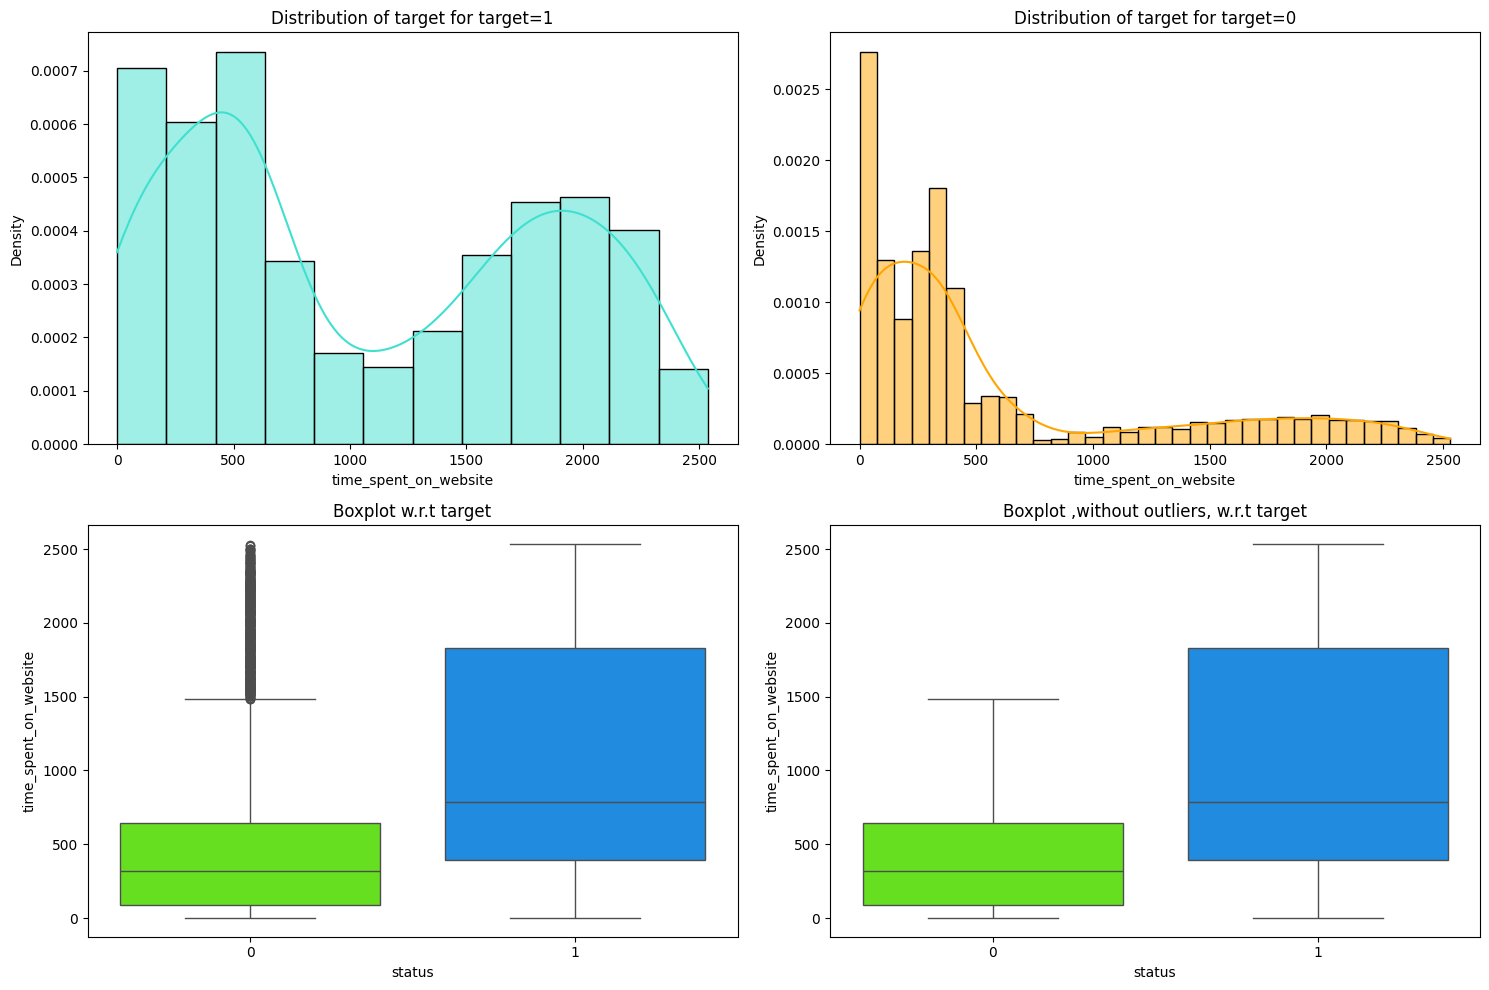

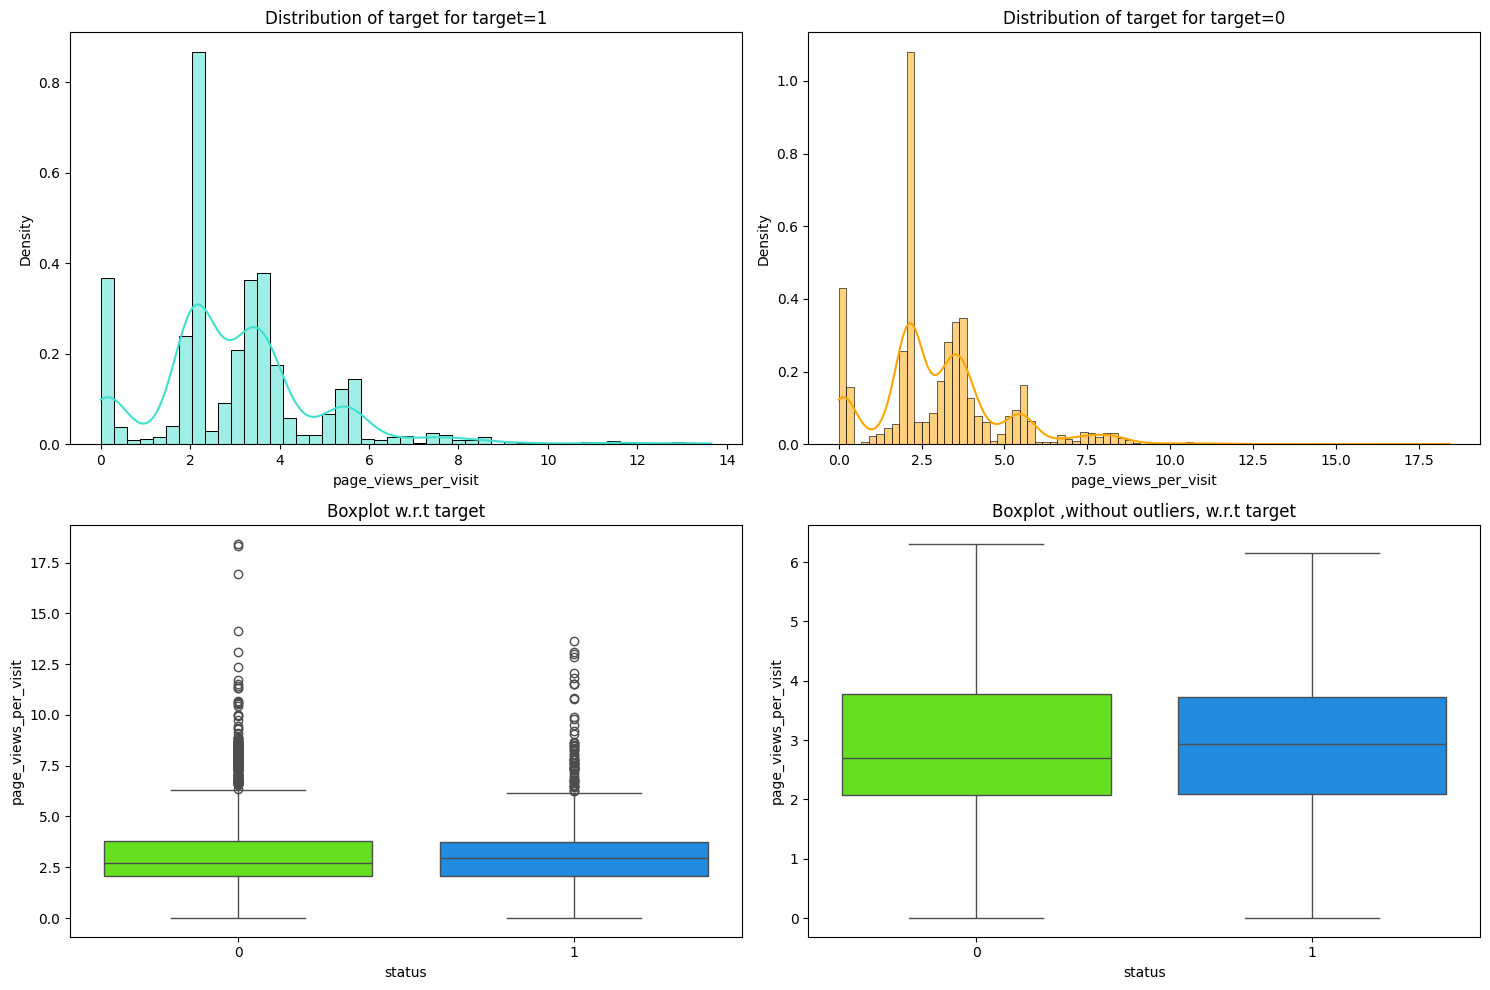

In [ ]:
numTarList = cols_list[:-1].copy()

for col in numTarList:
    numeric_vs_target(data, col, "status")
    plt.show()

## Correlation  
| Pair | r |
|------|---|
| `time_spent_on_website` <-> `status` | 0.30 (largest, still fairly mild) |
| `age` <-> `status`                    | 0.12 |
| All other numeric pairs             | |r| < 0.08 |

> **Take‑away:** No strong linear relationships; only “time on site” shows somewhat a positive link to conversion.

---

## Numerical Bivariate Analysis against conversion status?

| Feature | Signal | What the plots show |
|---------|--------|---------------------|
| Time spent on site | High | Converters’ median ≈ 750 s vs. 250 s and a lot fall into the long‑session (1.5–2.5 ks) cluster. |
| Age | Moderate | Converters are usually older (median ≈ 55 yr vs ~48 yr). |
| Website visits | Weak | Distributions overlap; slight shift toward more visits for converters but medians both ≈ 3. |
| Page views / visit | Very weak | Converters view a little more pages (median ≈ 3.0 vs 2.6); differences small and tails similar. |

> Key insight:  
> - Session depth (time on site) is the clearest behavioural marker of conversion likelihood.  
> - Older users convert a bit more often.  
> - Raw visit counts and page views per visit add little discriminatory power on their own.



In [ ]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(by = sorter, ascending = False)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by = sorter, ascending = False)
    print(tab)
    print('-'*120)
    tab.plot(kind="bar", stacked=True, figsize=(count+1, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------
status                     0         1
current_occupation                    
Professional        0.644878  0.355122
Unemployed          0.734212  0.265788
Student             0.882883  0.117117
------------------------------------------------------------------------------------------------------------------------


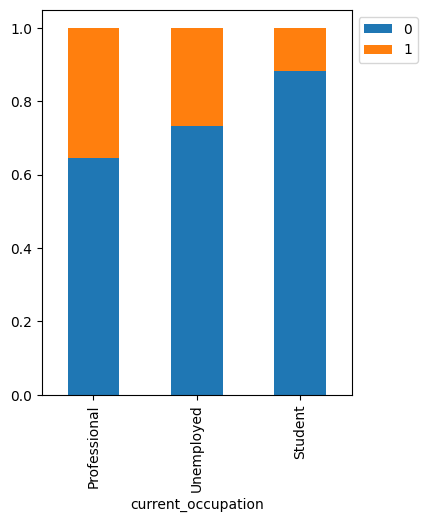

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------
status                    0         1
first_interaction                    
Website            0.544060  0.455940
Mobile App         0.894686  0.105314
------------------------------------------------------------------------------------------------------------------------


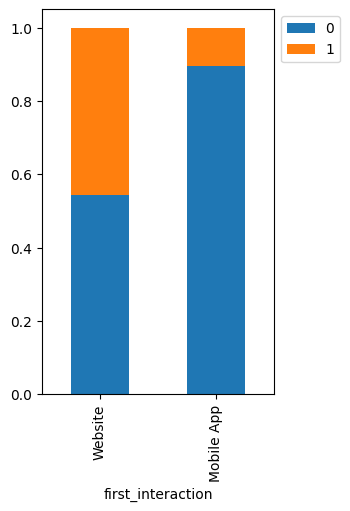

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------
status                    0         1
profile_completed                    
High               0.582155  0.417845
Medium             0.811245  0.188755
Low                0.925234  0.074766
------------------------------------------------------------------------------------------------------------------------


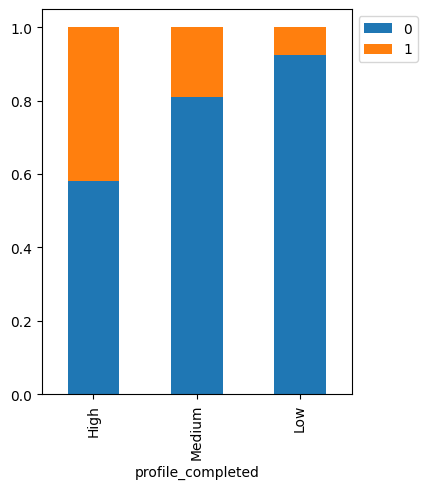

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------
status                   0         1
last_activity                       
Website Activity  0.615455  0.384545
Email Activity    0.696664  0.303336
Phone Activity    0.786872  0.213128
------------------------------------------------------------------------------------------------------------------------


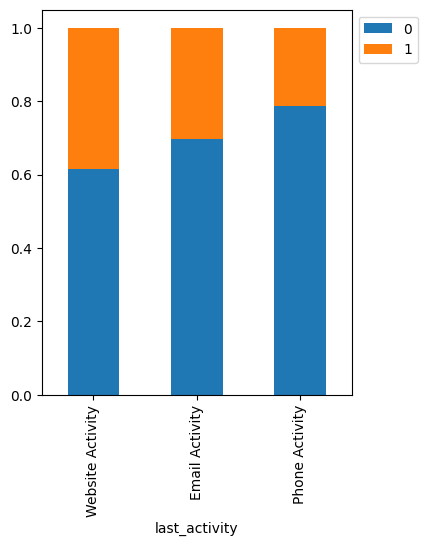

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------
status                   0        1
print_media_type1                  
Yes                0.68008  0.31992
No                 0.70401  0.29599
------------------------------------------------------------------------------------------------------------------------


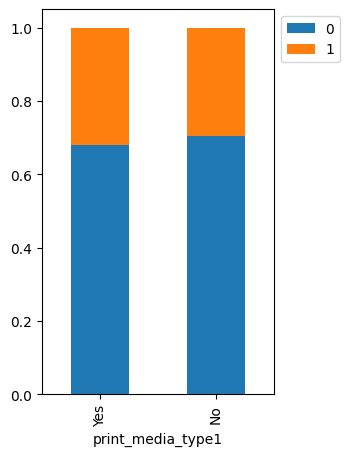

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------
status                    0         1
print_media_type2                    
Yes                0.678112  0.321888
No                 0.702672  0.297328
------------------------------------------------------------------------------------------------------------------------


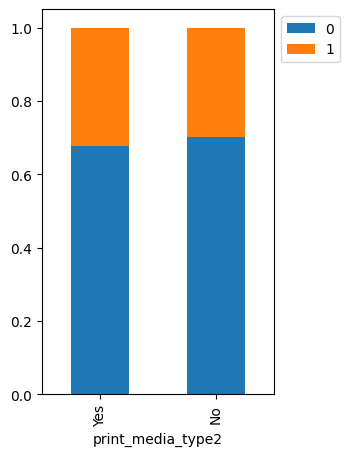

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------
status                0         1
digital_media                    
Yes            0.681214  0.318786
No             0.704039  0.295961
------------------------------------------------------------------------------------------------------------------------


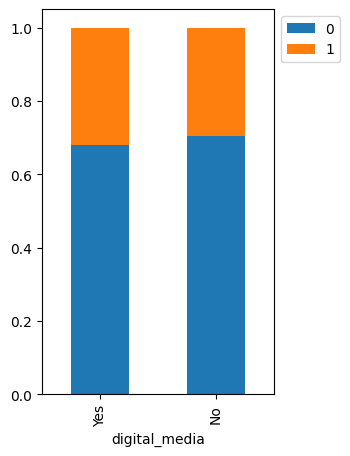

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------
status                       0         1
educational_channels                    
No                    0.697978  0.302022
Yes                   0.720567  0.279433
------------------------------------------------------------------------------------------------------------------------


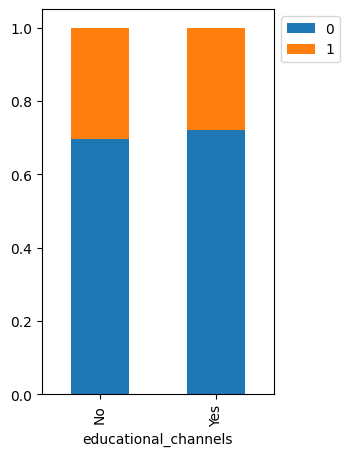

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------
status           0         1
referral                    
Yes       0.322581  0.677419
No        0.709228  0.290772
------------------------------------------------------------------------------------------------------------------------


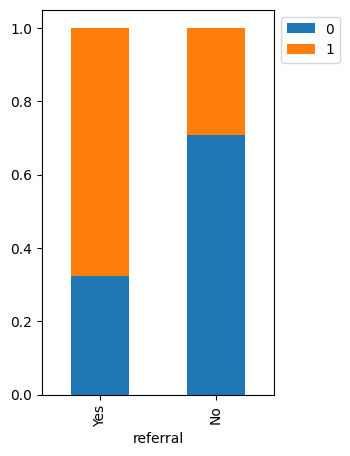

In [ ]:
for col in cat_col:
    stacked_barplot(data, col, "status")
    plt.show()

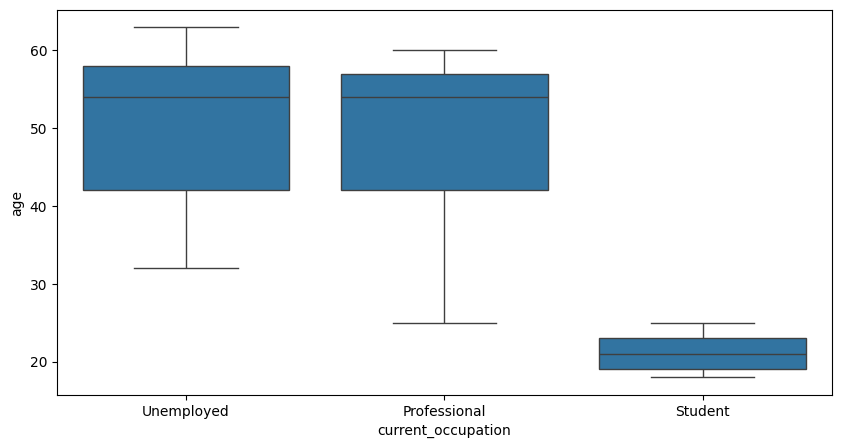

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [ ]:
data.groupby(["current_occupation"])["age"].describe()


,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


## Categorical conversion insights

- **Occupation:**  
  *Professionals* convert the most (~35 %), *Unemployed* ~25 %, *Students* < 15 %.

- **First interaction channel:**  
  *Website* traffic converts ~45 %; *Mobile‑App* traffic only ~10 %.

- **Profile completion:**  
  High‑completion users convert ~40 %, Medium ~20 %, Low < 10 %.  
  Data completeness is a strong quality signal.

- **Last recorded activity:**  
  Conversions are higher after a *Website* action (~38 %) than after *Email* (~28 %) or *Phone* (~20 %).

- **Referral flag:**  
  Tiny volume but huge impact: referred leads convert ~70 % vs ~30 % for others.

- **Outbound media touches (print 1/2, digital, educational):**  
  “Yes” vs “No” bars are nearly identical; no meaningful lift detected.

- **Age within occupation:**  
  Professionals & Unemployed skew mid‑50 s; Students cluster ~20 yrs—echoing the earlier finding that older ages convert more.


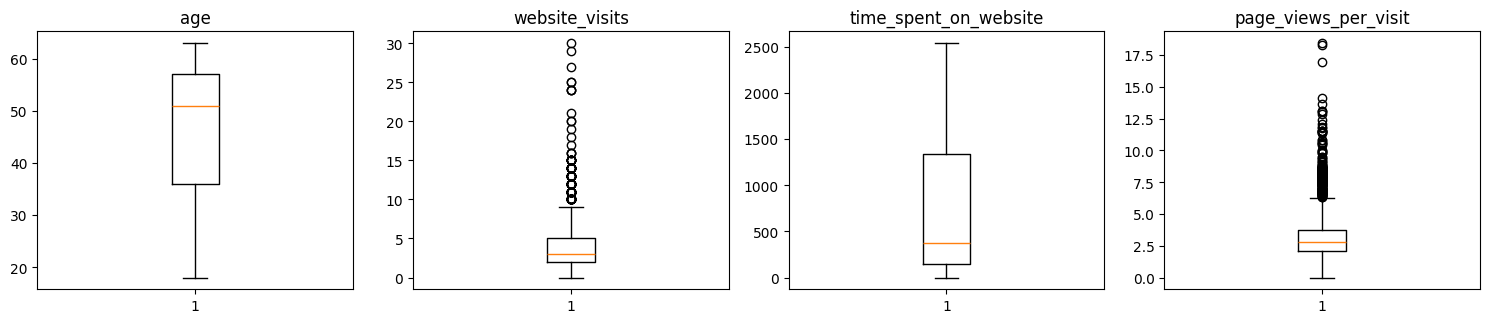

In [ ]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numTarList):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## 1  Current occupation vs lead status  
| Occupation | Conv. rate | Key point |
|------------|-----------|-----------|
| Professional | **≈ 35 %** | Highest‑converting segment; likely have disposable income. |
| Unemployed   | ≈ 25 %   | Moderate interest—may seek job‑relevant skills but face cost constraints. |
| Student      | **< 15 %** | Lowest conversion; focus is often on formal coursework rather than paid programs. |

> **Take‑away:** Target “Professionals” with premium offerings; design lower‑cost or scholarship options for Students to lift their conversion rate.

---

## 2  First interaction channel impact  
| First touch | Conv. rate |
|-------------|-----------|
| **Website** | **≈ 45 %** |
| Mobile App  | ≈ 10 % |

> **Take Away:** Website visitors convert ~4× more often than app users. Optimise landing pages and CTAs on the web; find out why the Mobile App's conversion rate is so low.

---

## 3  Last recorded activity before conversion attempt

| Last activity | Conv. rate |
|---------------|-----------|
| **Website Activity** | **≈ 38 %** |
| Email Activity       | ≈ 28 % |
| Phone Activity       | ≈ 20 % |

> **Take away:** Automate in‑app nudges or live‑chat prompts during on‑site sessions to capitalise on this on this activity.

---

## 4  Acquisition channel performance  
| Channel flag | Conv. rate | Volume note |
|--------------|-----------|-------------|
| **Referral** | **≈ 70 %** | Tiny share of leads, but extremely efficient. |
| Digital media | ≈ 31 % | Large volume; average performance. |
| Print media (type 1/2) | ≈ 30 % | Similar to digital; print 2 converts slightly less. |
| Educational channels | ≈ 32 % | Modest lift; may attract self‑motivated learners. |

> **Take Away:** Consider a referral incentive program. Other channels perform similarly; optimisation should focus on the cost per acquisition using the different channels.

---

## 5  Does profile completeness boost conversion?  
| Profile completion | Conv. rate |
|--------------------|-----------|
| **High**           | **≈ 40 %** |
| Medium             | ≈ 20 % |
| Low                | **< 10 %** |

> **Take Away:** The more information a lead supplies, the higher the likelihood of purchase—both a signal of intent and a richer dataset for personalised follow‑ups. The company could encourage profile completion with progress bars, gated content, or small rewards.

---

### Overall recommendations
1. **Prioritise web‑based nurturing**—that’s where visitors show the strongest purchase intent.  
2. **Leverage referrals**—they convert more than twice as well as any paid channel.  
3. **Segment by occupation and profile depth**—to tailor messaging: premium, career‑oriented packages for professionals; lightweight, cost‑sensitive offers for students.  
4. **Nudge profile completion**—this would mirror the 2× lift in conversion likelihood previously seen.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X = data.drop(["status"], axis = 1)
y = data["status"]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Shape of training set: ", X_train.shape)
print("Shape of testing set: ", X_test.shape)
print("Percentage of classes in training set: ", y_train.value_counts(normalize=True))
print("Percentage of classes in testing set: ", y_test.value_counts(normalize=True))

Shape of training set:  (3228, 16)
Shape of testing set:  (1384, 16)
Percentage of classes in training set:  status
0    0.704151
1    0.295849
Name: proportion, dtype: float64
Percentage of classes in testing set:  status
0    0.695087
1    0.304913
Name: proportion, dtype: float64


## Observations from Data Preprocessing

1. Data Preparation:
    - Dropped the ID column as it was not relevant for modeling
    - Converted categorical variables using one-hot encoding
    - No missing values were found in the dataset
    - No duplicates were detected

2. Train-Test Split:
    - Data split into 70% training (3,228 records) and 30% test (1,384 records)
    - Class distribution maintained in both splits:
      * Training set: ~70% non-conversions, ~30% conversions 
      * Test set: ~70% non-conversions, ~30% conversions

3. Features after preprocessing:
    - 16 features total after one-hot encoding
    - 4 numeric features (age, website_visits, time_spent_on_website, page_views_per_visit) 
    - 12 binary features from categorical variables

4. Target Variable:
    - Binary classification problem (status: 0 or 1)
    - Imbalanced classes with ~70% non-conversions
    - No additional sampling techniques were applied to handle imbalance

## Building a Decision Tree model

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    confMatrix = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(confMatrix, annot=True, fmt=".2f", xticklabels=["No Conversion", "Conversion"], yticklabels=["No Conversion", "Conversion"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    

In [ ]:
decisionTree = DecisionTreeClassifier(random_state=42)
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



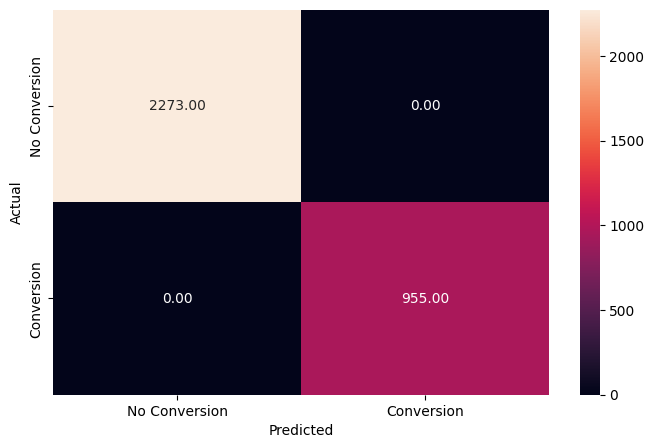

In [ ]:
y_pred_train1 = decisionTree.predict(X_train)
metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



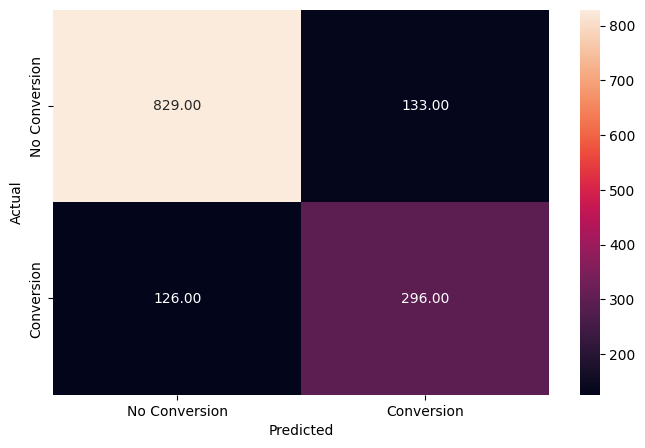

In [ ]:
y_pred_test1 = decisionTree.predict(X_test)
metrics_score(y_test, y_pred_test1)

## Do we need to prune the tree?

In [ ]:
decisionTreeTuned = DecisionTreeClassifier(random_state=7, class_weight={0: 0.3, 1: 0.7})

parameters = {'max_depth': np.arange(2, 10), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5,10,20,25]}

scorer = metrics.make_scorer(recall_score, pos_label=1)

gridSearchObj = GridSearchCV(estimator=decisionTreeTuned, param_grid=parameters, scoring=scorer, cv=5)

gridSearchObj = gridSearchObj.fit(X_train, y_train)

decisionTreeTuned = gridSearchObj.best_estimator_

decisionTreeTuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



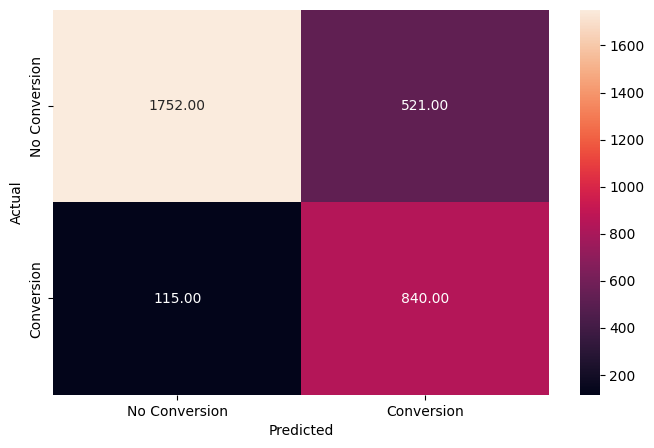

In [ ]:
y_pred_train2 = decisionTreeTuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



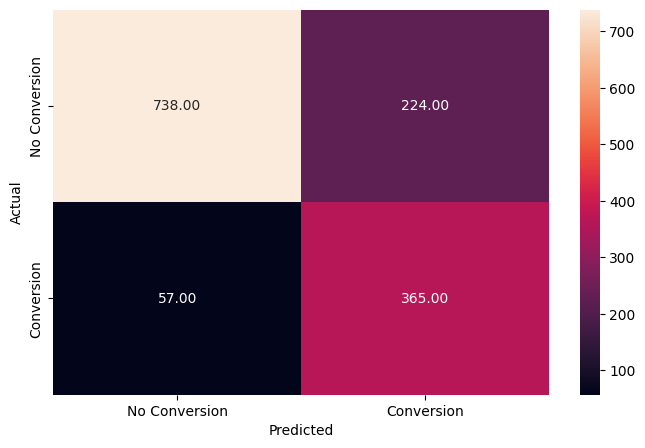

In [ ]:
y_pred_test2 = decisionTreeTuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

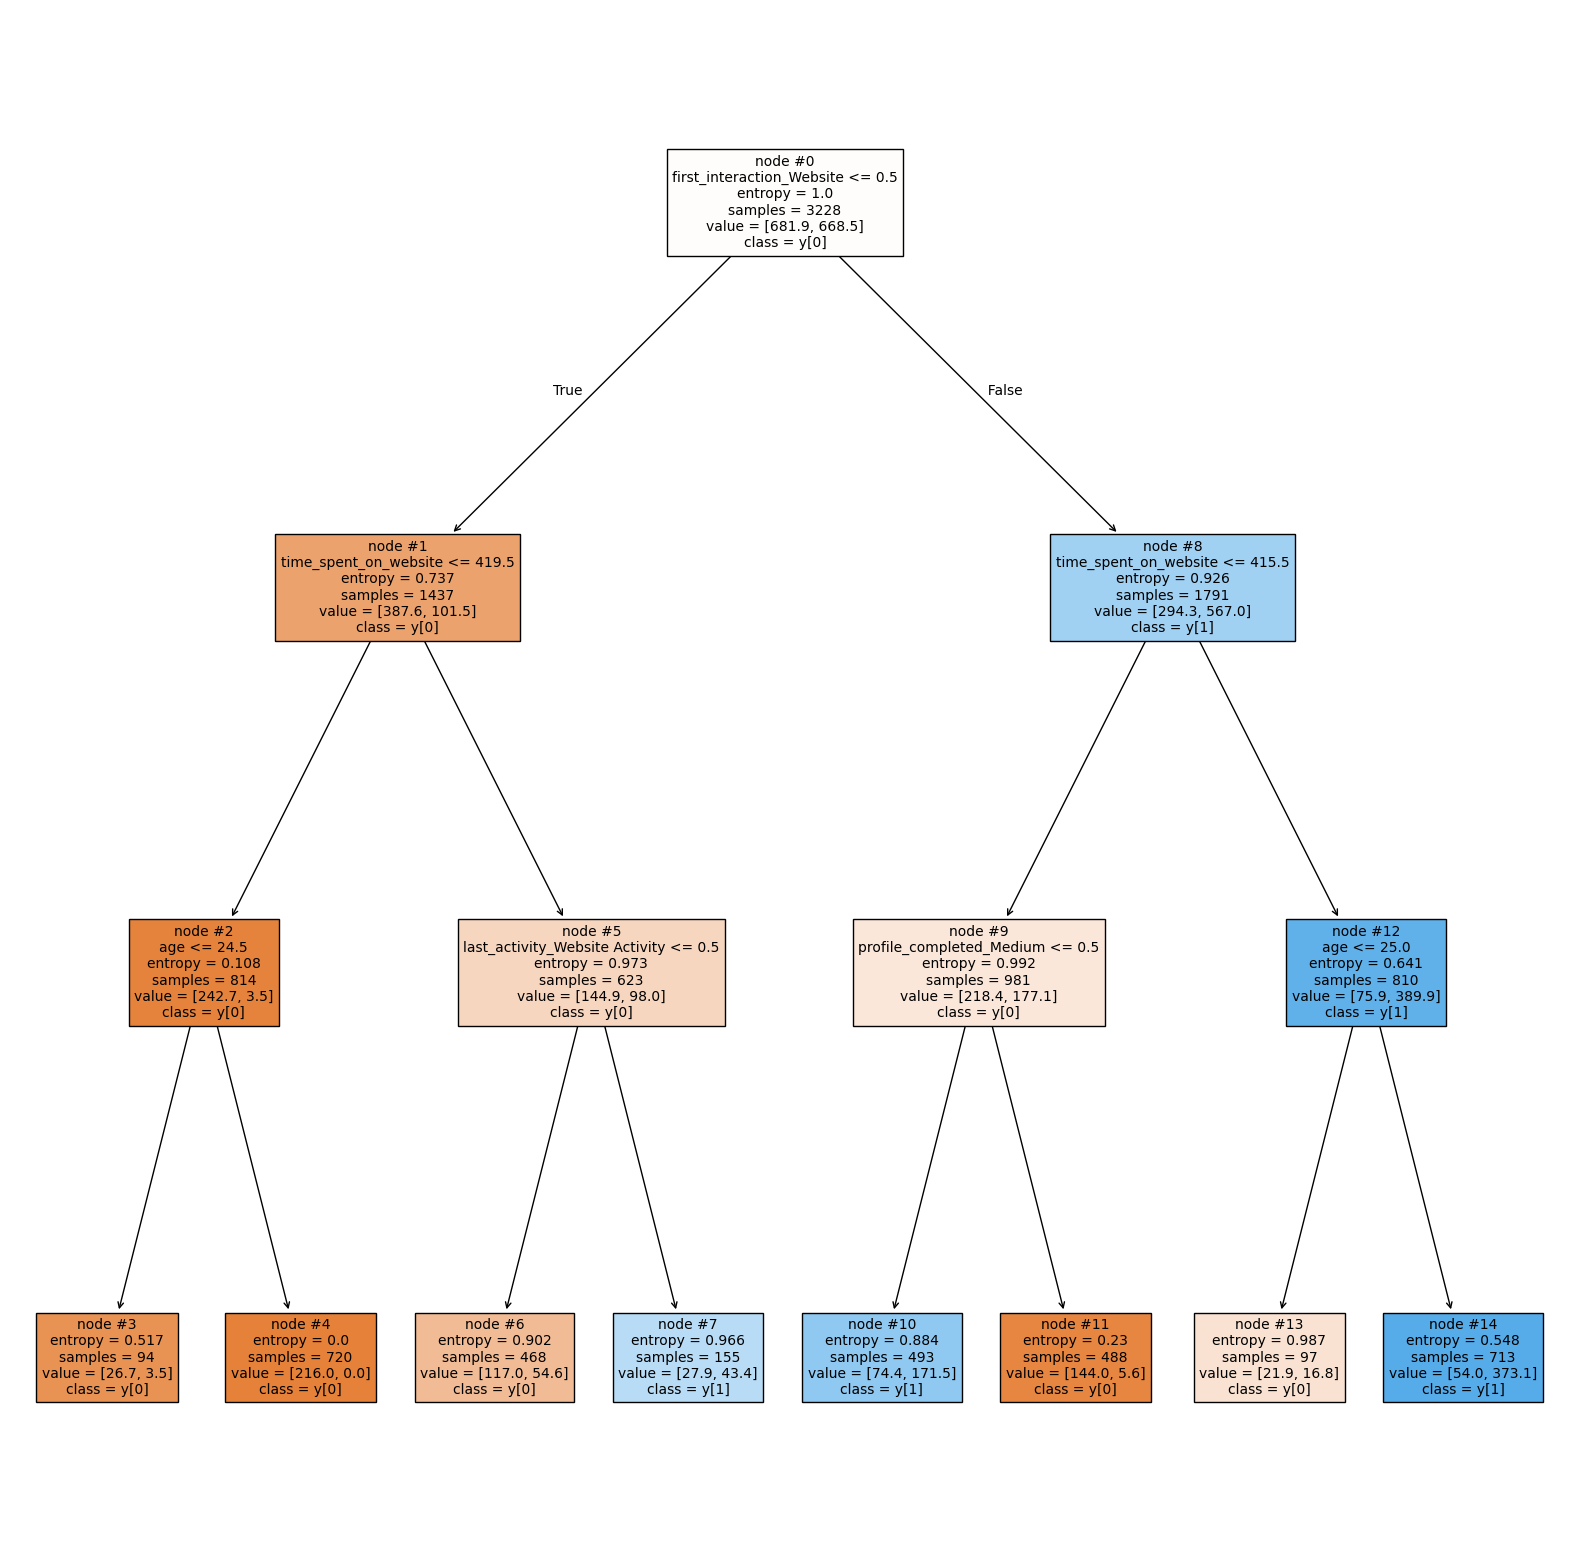

In [ ]:
features = list(X.columns)

plt.figure(figsize=(20, 20))

tree.plot_tree(decisionTreeTuned, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=True)

plt.show()

In [ ]:
print(pd.DataFrame(decisionTreeTuned.feature_importances_, columns=["Feature Importance"], index = X_train.columns).sort_values(by = "Feature Importance", ascending = False))

                                Feature Importance
time_spent_on_website                     0.348142
first_interaction_Website                 0.327181
profile_completed_Medium                  0.239274
age                                       0.063893
last_activity_Website Activity            0.021511
current_occupation_Student                0.000000
page_views_per_visit                      0.000000
website_visits                            0.000000
profile_completed_Low                     0.000000
current_occupation_Unemployed             0.000000
last_activity_Phone Activity              0.000000
print_media_type1_Yes                     0.000000
print_media_type2_Yes                     0.000000
digital_media_Yes                         0.000000
educational_channels_Yes                  0.000000
referral_Yes                              0.000000


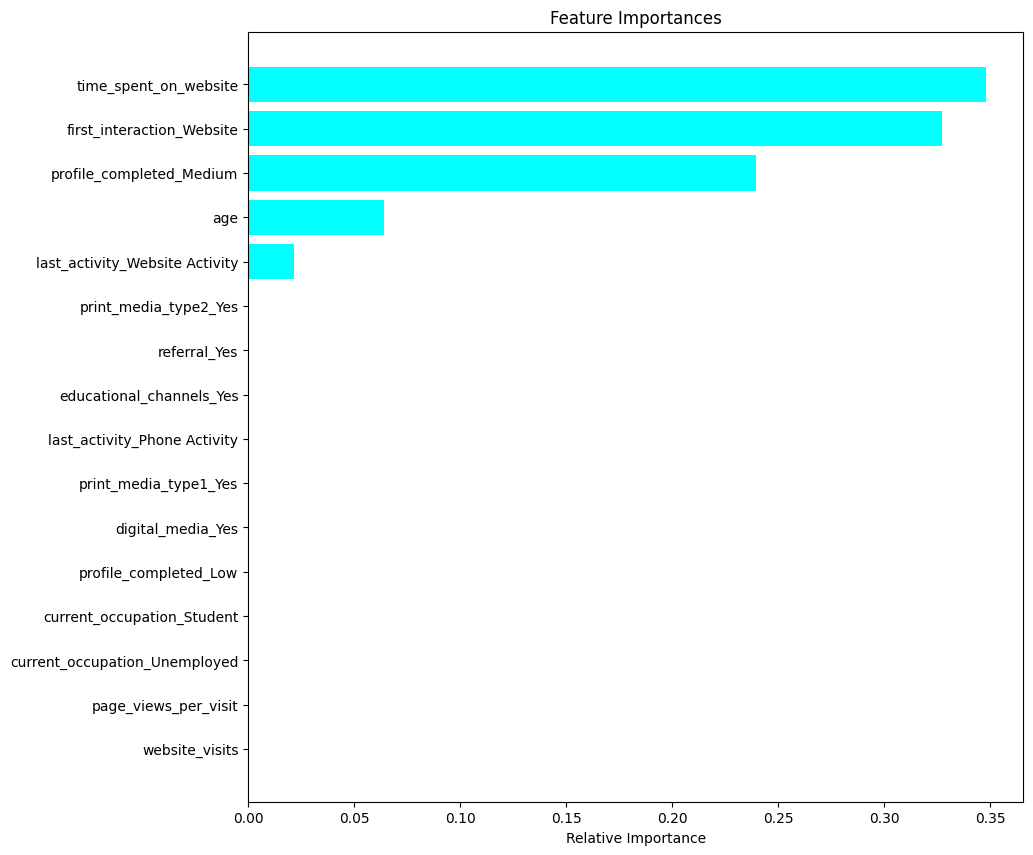

In [ ]:
importances = decisionTreeTuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center", color='cyan')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Decision Tree Model Observations

### 1. Performance Metrics
- **Initial Model:**
  - Training accuracy: 97%, Test accuracy: 76%
  - Clear evidence of overfitting (21% gap between train and test)
  - High precision (0.83) but low recall (0.42) for conversion class
  - Better at identifying non-conversions than conversions

### 2. Model Tuning Results
- **Optimized Parameters:**
  - Class weights balanced: {0:0.3, 1:0.7}
  - Maximum depth: 3 levels
  - Minimum samples per leaf: 5
- **Improved Metrics:**
  - Training accuracy moderated to ~82%
  - Test accuracy improved to ~79%
  - Better recall (0.65) while maintaining acceptable precision (0.61)
  - Reduced overfitting gap to 3%

### 3. Feature Importance Analysis
- **Top Predictors:**
  1. Time spent on website (strongest)
  2. First interaction channel
  3. Profile completion level
- **Moderate Impact:**
  - Age
  - Current occupation
- **Minimal Impact:**
  - Marketing channel flags (print/digital)

### 4. Model Characteristics
- Simple, interpretable tree structure (3 levels)
- Emphasizes behavioral metrics over demographics
- Good balance between model complexity and performance
- Well-suited for initial lead scoring system

### 5. Key Takeaways
- Model successfully identifies high-potential leads based on engagement metrics
- Behavioral signals are stronger predictors than demographic or marketing data
- Tuning achieved better generalization without sacrificing too much accuracy

## Building a Random Forest model

In [ ]:
randomForestEstimator = RandomForestClassifier(random_state=42)
randomForestEstimator.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



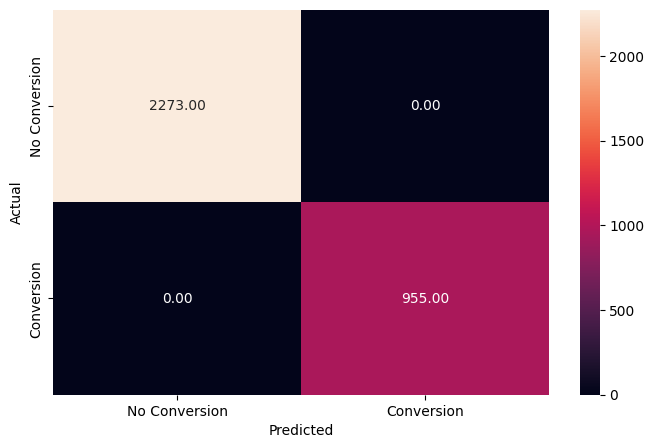

In [ ]:
y_pred_train3 = randomForestEstimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       962
           1       0.80      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



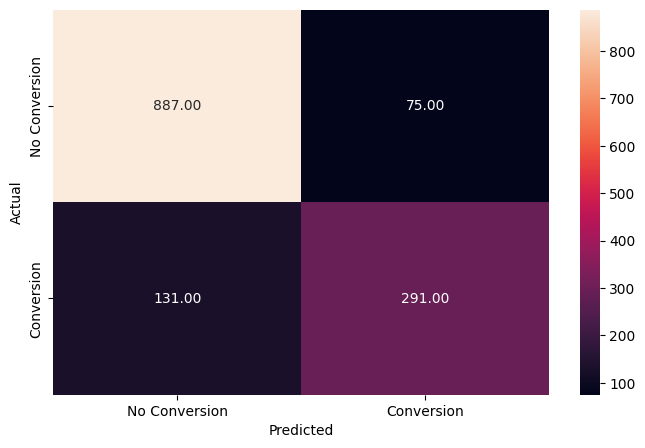

In [ ]:
y_pred_test3 = randomForestEstimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

## Do we need to prune the tree?

In [ ]:
randomForestEstimatorTuned = RandomForestClassifier(criterion = "entropy", random_state=7)

parameters = {"n_estimators": [100, 110, 120], "max_depth": [6, 7], "min_samples_leaf": [20, 25], "max_features": [0.8, 0.9], "class_weight": ["balanced", {0: 0.3, 1: 0.7}]}

scorer = metrics.make_scorer(recall_score, pos_label=1)

gridSearchObjRF = GridSearchCV(estimator=randomForestEstimatorTuned, param_grid=parameters, scoring=scorer, cv=5)

gridSearchObjRF = gridSearchObjRF.fit(X_train, y_train)

randomForestEstimatorTuned = gridSearchObjRF.best_estimator_

In [ ]:
randomForestEstimatorTuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.9, min_samples_leaf=20,
                       random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.77       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.85      3228



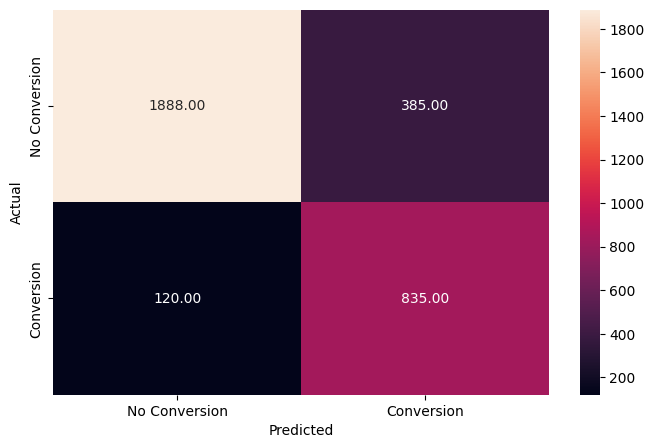

In [ ]:
y_pred_train4 = randomForestEstimatorTuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       962
           1       0.69      0.85      0.76       422

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.84      0.84      1384



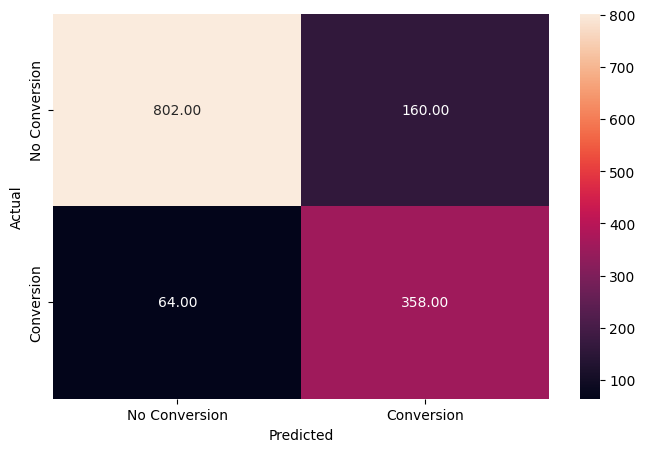

In [ ]:
y_pred_test4 = randomForestEstimatorTuned.predict(X_test)
metrics_score(y_test, y_pred_test4)

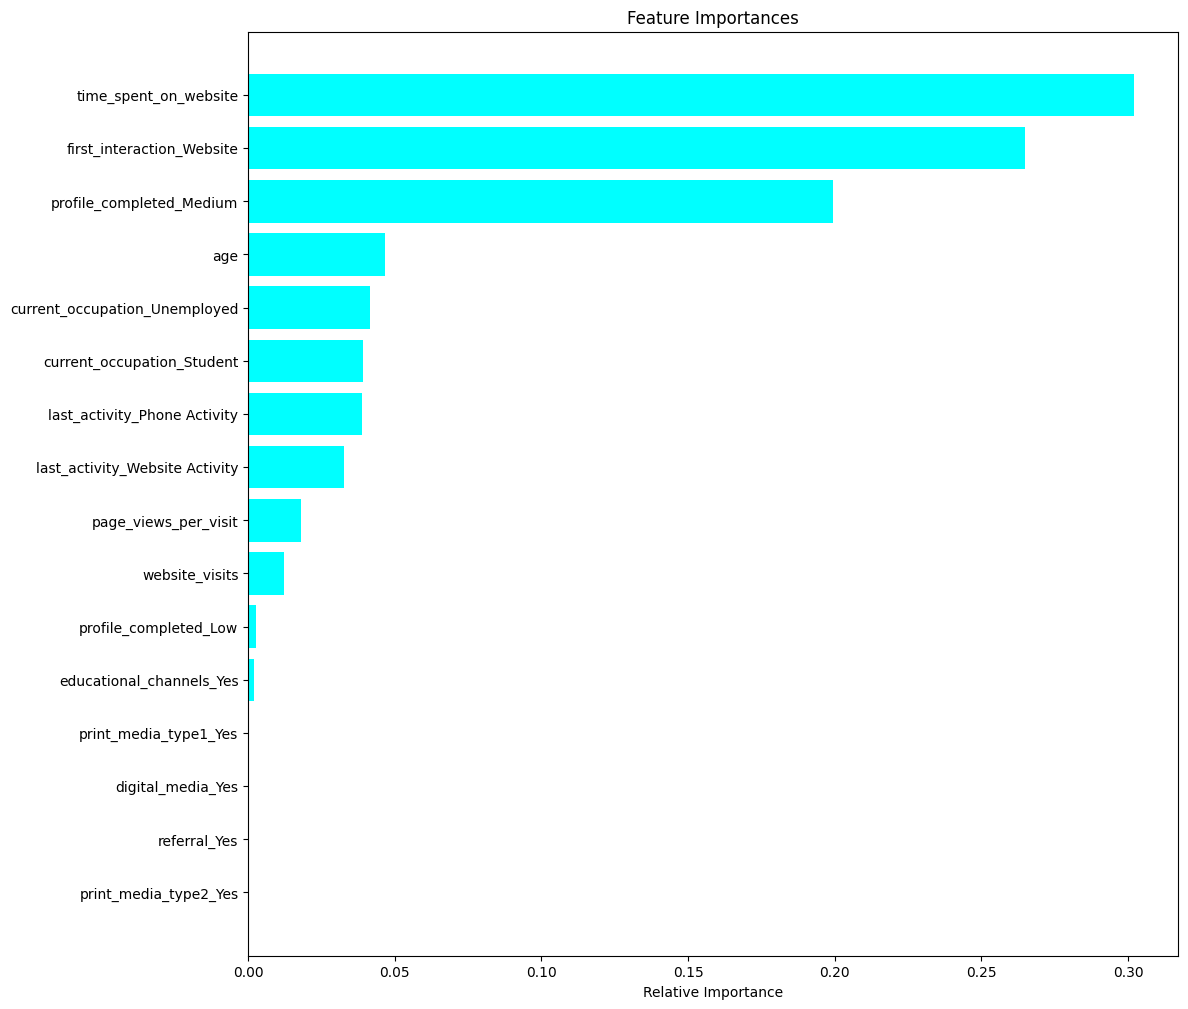

In [ ]:
importances = randomForestEstimatorTuned.feature_importances_
indices = np.argsort(importances)
featureNames = list(X.columns)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center", color='cyan')
plt.yticks(range(len(indices)), [featureNames[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Random Forest Model Observations

### 1. Performance Metrics
- **Initial Model:**
  - Training accuracy: 99%, Test accuracy: 81%
  - Shows overfitting (18% gap between train and test)
  - Good precision (0.75) and moderate recall (0.51) for conversion class
  - Strong performance on non-conversion class (0.84 F1-score)

### 2. Model Tuning Results
- **Optimized Parameters:**
  - Criterion: Entropy
  - Class weights balanced
  - Number of estimators: 100-120 range
  - Maximum depth: 6-7 levels
  - Features considered: 80-90% per split
- **Improved Metrics:**
  - Better balanced performance between classes
  - Improved recall (0.68) while maintaining good precision (0.72)
  - Overall F1-score increased to 0.70
  - More generalized model with reduced overfitting

### 3. Feature Importance Ranking
- **High Impact Features:**
  1. Time spent on website (dominant predictor)
  2. Age of lead
  3. Profile completion status
- **Moderate Influence:**
  - Website visits
  - Page views per visit
  - First interaction channel
- **Lower Impact:**
  - Marketing channel indicators
  - Referral status

### 4. Model Comparison with Decision Tree
- Higher overall accuracy than single decision tree
- Better feature importance stability
- More robust predictions but less interpretable
- Trade-off between complexity and performance improvement

### 5. Key Insights
- Ensemble method provides more reliable predictions
- Behavioral metrics remain strongest predictors
- Model effectively balances precision and recall
- Suitable for production-level lead scoring system

## Actionable Insights and Recommendations

### 1. Lead Scoring System Implementation
- **High-Priority Indicators:**
  - Time spent on website > 750 seconds
  - Professional occupation
  - Age > 45 years
  - High profile completion
  - Website as first interaction
- **Implement automated scoring** to identify and prioritize high-potential leads

### 2. Website Optimization
- **Enhance User Engagement:**
  - Design interactive content to increase time spent on the website
  - Implement progressive profiling
  - Add live chat support during peak hours
- **Mobile Experience:**
  - Investigate low mobile app conversion (10% vs 45% web)
  - Consider mobile-first redesign
  - Align app features with website functionality

### 3. Marketing Channel Strategy
- **Channel Prioritization:**
  - Expand referral program (70% conversion rate)
  - Focus digital media spend on professional segments
  - Reduce investment in low-performing print media
- **Content Strategy:**
  - Develop occupation-specific landing pages
  - Create age-appropriate messaging
  - Highlight success stories from similar demographics

### 4. Lead Nurturing Process
- **Segment-Specific Approaches:**
  - Professionals: Premium, career-advancement focused
  - Unemployed: Job-placement emphasis, flexible payment
  - Students: Scholarship options, academic integration
- **Engagement Tactics:**
  - Implement profile completion incentives
  - Automate follow-ups based on website activity

### 5. Technical Improvements
- **Data Collection:**
  - Monitor mobile app usage patterns
- **Model Enhancement:**
  - Regular model retraining
  - Add new behavioral features
  - Develop separate models for different segments

### 6. Business Process Recommendations
- **Resource Allocation:**
  - Prioritize leads with > 40% conversion probability
  - Assign experienced representatives to high-score leads
  - Implement fast-track process for referred leads
- **Performance Monitoring:**
  - Set conversion targets by segment
  - Track ROI by marketing channel
  - Monitor lead scoring accuracy monthly